In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0


In [4]:
print("Інформація про датасет:")
print(df.info())

Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  2338 non-null   float64
 1   Unicorn Horn     2338 non-null   float64
 2   Dragon's Blood   2338 non-null   float64
 3   Mermaid Tears    2338 non-null   float64
 4   Fairy Dust       2338 non-null   float64
 5   Goblin Toes      2338 non-null   float64
 6   Witch's Brew     2338 non-null   float64
 7   Griffin Claw     2338 non-null   float64
 8   Troll Hair       2338 non-null   float64
 9   Kraken Ink       2338 non-null   float64
 10  Minotaur Horn    2338 non-null   float64
 11  Basilisk Scale   2338 non-null   float64
 12  Chimera Fang     2338 non-null   float64
 13  Cured            2338 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 255.8 KB
None


In [5]:
print("Перевірка на пропущені значення:")
print(df.isnull().sum())

Перевірка на пропущені значення:
Phoenix Feather    0
Unicorn Horn       0
Dragon's Blood     0
Mermaid Tears      0
Fairy Dust         0
Goblin Toes        0
Witch's Brew       0
Griffin Claw       0
Troll Hair         0
Kraken Ink         0
Minotaur Horn      0
Basilisk Scale     0
Chimera Fang       0
Cured              0
dtype: int64


In [6]:
print("Перевірка на дублікати:")
print(df.duplicated().sum())

print("\nСтатистичний опис:")
print(df.describe())

print("\nРозподіл цільової змінної 'Cured':")
print(df['Cured'].value_counts())

Перевірка на дублікати:
0

Статистичний опис:
       Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  \
count      2338.000000   2338.000000     2338.000000    2338.000000   
mean         15.365697     10.946749       16.115654      13.627973   
std           8.669969      7.225162        8.372518       7.545244   
min           1.000000      1.000000        1.000000       1.000000   
25%           8.500000      5.300000        9.600000       7.600000   
50%          14.700000      9.500000       15.800000      13.100000   
75%          21.300000     15.575000       22.000000      19.000000   
max          42.100000     34.100000       40.800000      35.800000   

        Fairy Dust  Goblin Toes  Witch's Brew  Griffin Claw   Troll Hair  \
count  2338.000000  2338.000000   2338.000000   2338.000000  2338.000000   
mean     15.069504    14.157271     12.328914     14.911206    16.871685   
std       8.349340     7.831476      7.709753      8.132678     9.579027   
min       

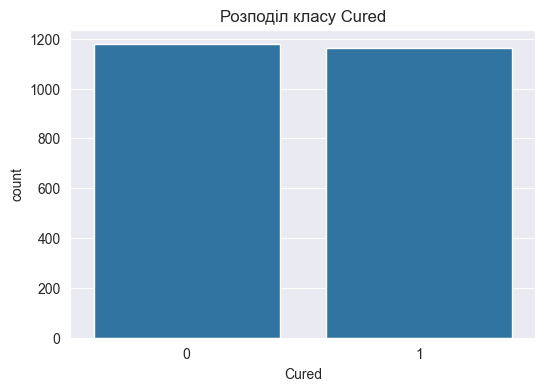

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cured', data=df)
plt.title('Розподіл класу Cured')
plt.show()

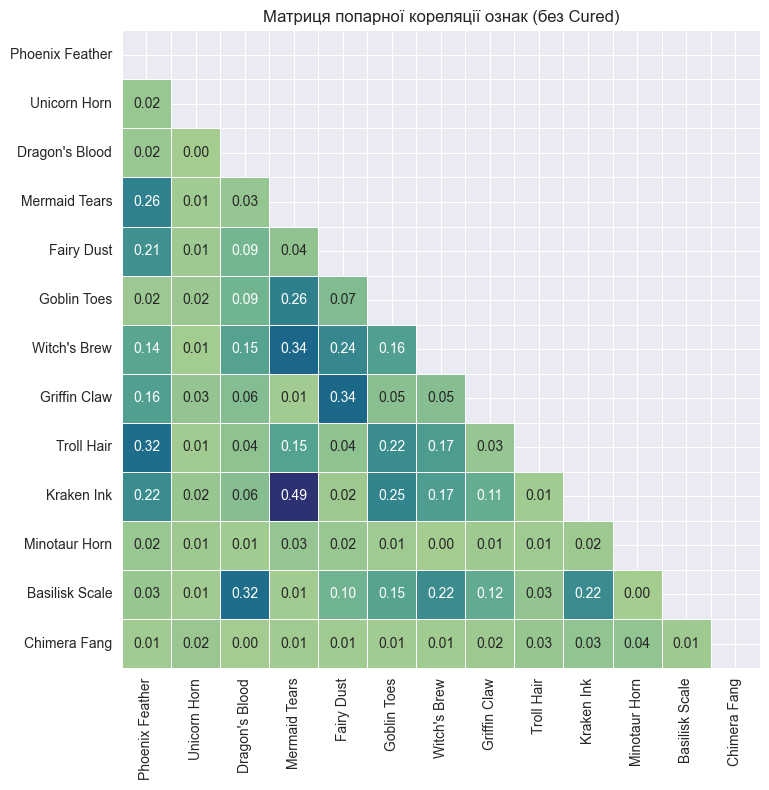

In [8]:
# побудова матриці кореляцій
mtx = df.drop('Cured', axis=1).corr(numeric_only=True).abs()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    mtx,
    cmap='crest',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),
    square=True,
    cbar=False,
    ax=ax
)
plt.title("Матриця попарної кореляції ознак (без Cured)")
plt.tight_layout()
plt.show()

In [9]:
# кореляція ознак саме з цільовою змінною
print("\nКореляція ознак з 'Cured':")
corr_pr = df.corr(numeric_only=True)['Cured'].abs().sort_values(ascending=False)
print(corr_pr)


Кореляція ознак з 'Cured':
Cured              1.000000
Troll Hair         0.498165
Witch's Brew       0.245993
Basilisk Scale     0.052436
Goblin Toes        0.046314
Kraken Ink         0.022845
Chimera Fang       0.022144
Phoenix Feather    0.015931
Fairy Dust         0.015004
Minotaur Horn      0.011329
Mermaid Tears      0.009619
Unicorn Horn       0.008239
Dragon's Blood     0.007662
Griffin Claw       0.001019
Name: Cured, dtype: float64


Підготовка даних та навчання моделі

In [10]:
X = df.drop('Cured', axis=1)
y = df['Cured']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy (Base Model): 87.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       244
           1       0.85      0.89      0.87       224

    accuracy                           0.87       468
   macro avg       0.87      0.87      0.87       468
weighted avg       0.88      0.87      0.87       468



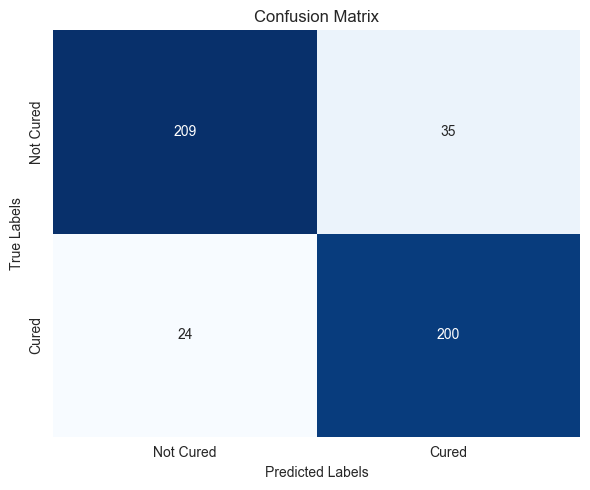

In [11]:
# Логістична Регресія
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (Base Model): {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Cured', 'Cured'], yticklabels=['Not Cured', 'Cured'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

In [12]:
# порівняння реальних та передбачених значень
comparison_df = pd.DataFrame({
    "True Class": y_test.values,
    "Predicted Class": y_pred
})

print("10 випадкових зразків порівняння:")
print(comparison_df.sample(10, random_state=17))

10 випадкових зразків порівняння:
     True Class  Predicted Class
410           1                1
443           0                0
398           1                1
269           0                0
70            0                1
35            1                1
455           1                1
345           1                0
113           0                0
344           1                1


Підбір гіперпараметрів

In [15]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid.fit(X_train_scaled, y_train)

print("\nGridSearchCV найкращі параметри:")
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

GridSearchCV найкращі параметри:
{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


In [16]:
param_dist = {
    'solver': ['liblinear', 'lbfgs'],
    'C': np.logspace(-2, 2, 10),
    'max_iter': [200, 500]
}

random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1,
    random_state=17
)
random_search.fit(X_train_scaled, y_train)

print("\nRandomizedSearchCV найкращі параметри:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

RandomizedSearchCV найкращі параметри:
{'solver': 'liblinear', 'max_iter': 500, 'C': np.float64(4.6415888336127775)}


In [17]:
best_model = random_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

print(f"\nAccuracy (Best Model): {accuracy_score(y_test, y_pred_best) * 100:.2f}%")
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Accuracy (Best Model): 87.39%

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       244
           1       0.85      0.89      0.87       224

    accuracy                           0.87       468
   macro avg       0.87      0.87      0.87       468
weighted avg       0.88      0.87      0.87       468



ВИСНОВКИ <br>
У результаті виконаної роботи було проведено аналіз даних, виявлено кореляції між ознаками та цільовою змінною 'Cured'. Було побудовано модель логістичної регресії для передбачення класу 'Cured', яка показала задовільну точність. Після підбору гіперпараметрів за допомогою GridSearchCV та RandomizedSearchCV вдалося покращити якість моделі. Отримані результати можуть бути використані для подальшого вдосконалення моделі та прийняття рішень на основі передбачень.